<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/Time_Series_Stationarity_and_Differencing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 6.9MB/s 
     |████████████████████████████████| 808kB 25.1MB/s 
     |████████████████████████████████| 2.1MB 20.6MB/s 
     |████████████████████████████████| 8.7MB 46.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
from  pandas_datareader import data
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.tsa.stattools import kpss,adfuller
import statsmodels.api as sm
import pmdarima as pm

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False


In [3]:
start_date = "2010-11-21"
end_date = "2020-11-21"

In [4]:
df = data.DataReader('GOOG','yahoo',start_date,end_date)

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-22,295.611969,290.286926,292.638123,294.506104,4389500.0,294.506104
2010-11-23,293.405243,288.020416,292.408966,290.416443,4341300.0,290.416443
2010-11-24,297.186066,292.428894,292.558411,296.374115,4810600.0,296.374115
2010-11-26,295.382843,292.403992,294.127533,293.898407,2632000.0,293.898407
2010-11-29,293.798767,288.892151,293.484955,289.968140,5740800.0,289.968140
...,...,...,...,...,...,...
2020-11-16,1799.069946,1767.689941,1771.699951,1781.380005,1246800.0,1781.380005
2020-11-17,1785.000000,1767.000000,1776.939941,1770.150024,1147100.0,1770.150024
2020-11-18,1773.469971,1746.140015,1765.229980,1746.780029,1173500.0,1746.780029


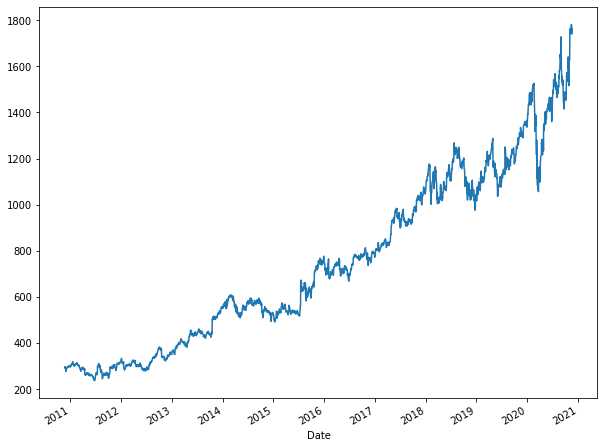

In [6]:
df['Close'].plot()

In [9]:
result = adfuller(df['Close'])
print(f"Test Statistics : {result[0]}")
print(f"p-value :{result[1]}")
print(f"Critical values: {result[4]}")

if result[1] > 0.5:
  print("Series not Stationary")
else:
  print("Series is Stationary")

Test Statistics : 0.8799813340424153
p-value :0.9928234364434458
Critical values: {'1%': -3.4329789374204935, '5%': -2.8627014485379787, '10%': -2.5673882843825098}
Series not Stationary


In [11]:
pm.arima.ndiffs(df['Close'],alpha=0.05,test='kpss',max_d=4)

1

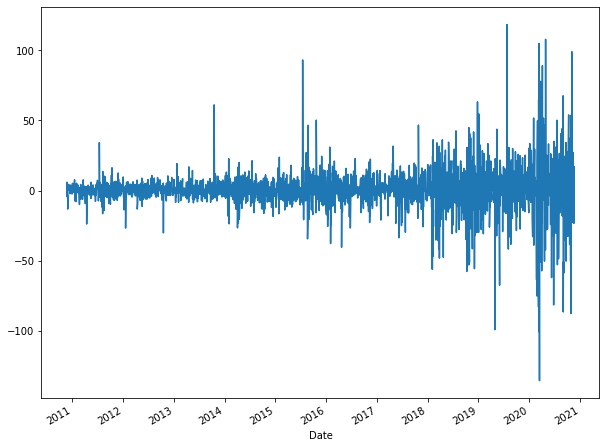

In [13]:
lag_goog= df['Close'].rolling(window=2).apply(lambda x: x.iloc[1]-x.iloc[0]).dropna()
lag_goog.plot()

In [14]:
pm.arima.ndiffs(lag_goog, alpha=0.05, test='kpss',max_d=4)

0

In [15]:
result = adfuller(lag_goog)
print(f"Test Statistics : {result[0]}")
print(f"p-value :{result[1]}")
print(f"Critical values: {result[4]}")

if result[1] > 0.5:
  print("Series not Stationary")
else:
  print("Series is Stationary")

Test Statistics : -9.987195075686712
p-value :2.0406384667165267e-17
Critical values: {'1%': -3.4329789374204935, '5%': -2.8627014485379787, '10%': -2.5673882843825098}
Series is Stationary


In [16]:
dfe= pd.read_csv("https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/nyc_energy_consumption.csv")

In [17]:
dfe

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0000,46.13
1,2012-01-01 01:00:00,4752.1,0.0000,45.89
2,2012-01-01 02:00:00,4542.6,0.0000,45.04
3,2012-01-01 03:00:00,4357.7,0.0000,45.03
4,2012-01-01 04:00:00,4275.5,0.0000,42.61
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [18]:
print("\n missing values:   ",dfe.isnull().any())


 missing values:    timeStamp    False
demand        True
precip        True
temp          True
dtype: bool


In [19]:
dfe['demand']= dfe['demand'].fillna(method='ffill')
dfe['temp']= dfe['temp'].fillna(method='ffill')

In [20]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49205 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49205 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [22]:
dfe['timeStamp']= pd.to_datetime(dfe['timeStamp'],infer_datetime_format=True)

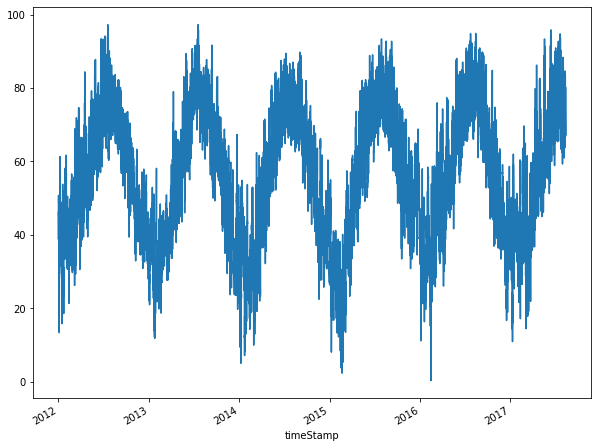

In [23]:
dfe.set_index('timeStamp')['temp'].plot()

In [26]:
stats,p,lags,critical_values=kpss(dfe['temp'])

print(f"Test Statistics : {stats}")
print(f"p-value :{p}")
print(f"Critical values: {critical_values}")

if p > 0.5:
  print("Series not Stationary")
else:
  print("Series is Stationary")


Test Statistics : 0.987647074929233
p-value :0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is Stationary


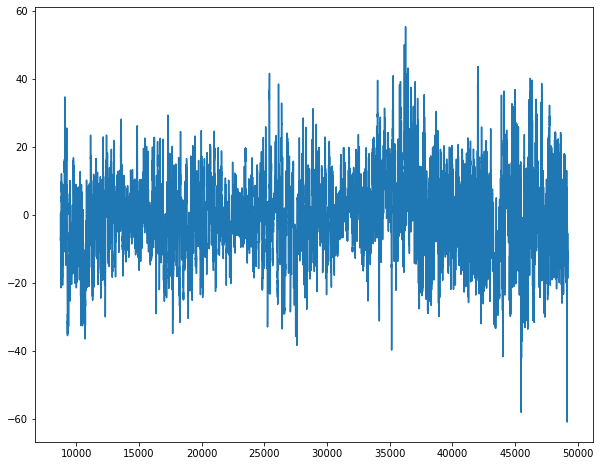

In [27]:
lag_temp= dfe['temp'].rolling(window=8760).apply(lambda x: x.iloc[8759]-x.iloc[0]).dropna()
lag_temp.plot()

In [28]:
stats,p,lags,critical_values=kpss(lag_temp)

print(f"Test Statistics : {stats}")
print(f"p-value :{p}")
print(f"Critical values: {critical_values}")

if p > 0.5:
  print("Series not Stationary")
else:
  print("Series is Stationary")


Test Statistics : 1.708759384276412
p-value :0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is Stationary


In [29]:
pm.arima.ndiffs(lag_temp, alpha=0.05, test='kpss',max_d=4)

1

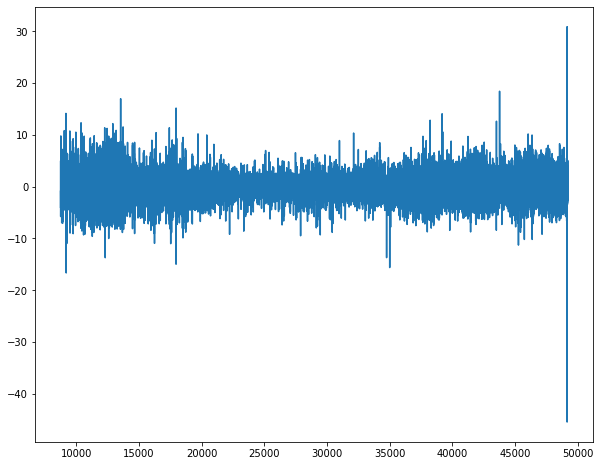

In [30]:
lag_temp.rolling(window=2).apply(lambda x: x.iloc[1]-x.iloc[0]).dropna().plot()

In [31]:
lag_temp_diff = lag_temp.rolling(window=2).apply(lambda x: x.iloc[1]- x.iloc[0]).dropna()

In [32]:
stats,p,lags,critical_values=kpss(lag_temp_diff)

print(f"Test Statistics : {stats}")
print(f"p-value :{p}")
print(f"Critical values: {critical_values}")

if p > 0.5:
  print("Series not Stationary")
else:
  print("Series is Stationary")


Test Statistics : 0.0014461900667549446
p-value :0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is Stationary
